In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as mse


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("data_cleaned.csv")


In [4]:
data.columns

Index(['manufacturer', 'model', 'version', 'fuel_date', 'odometer',
       'trip_distance(km)', 'quantity(kWh)', 'fuel_type', 'tire_type', 'city',
       'motor_way', 'country_roads', 'driving_style', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'avg_speed(km/h)', 'ecr_deviation', 'fuel_note'],
      dtype='object')

In [5]:
X=data.drop(['fuel_note','manufacturer', 'model', 'version', 'fuel_date', 'odometer',
       'trip_distance(km)', 'fuel_type','tire_type', 'driving_style',],axis=1)
Y=data['trip_distance(km)']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1)

In [7]:
lr=LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred=lr.predict(X_test)

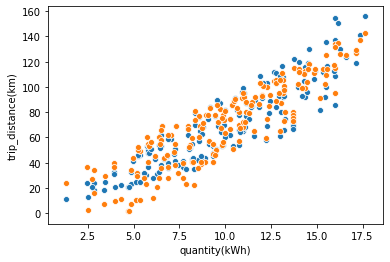

In [10]:
sns.scatterplot(X_test['quantity(kWh)'],y_test)
sns.scatterplot(X_test['quantity(kWh)'],y_pred)


In [11]:
mse(y_test,y_pred)

39.797908108629265

In [12]:
lr.score(X_test,y_test)

0.9607508817842889

In [13]:
data_enc_l=pd.read_csv("data_enc_label.csv")

In [14]:
data_enc_l.head()

,manufacturer,model,version,fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,...,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,tire_type_enc,driving_style_enc
0,Volkswagen,Golf,e-Golf,0.610891204,75140,67,7.97,Electricity,Summer tires,1,...,1,Normal,11.9,0,0,45.0,-0.8,Restreichweite 100km = Total 167km,0,1
1,Volkswagen,Golf,e-Golf,0.52755787,74977,106,12.29,Electricity,Summer tires,1,...,1,Moderate,11.6,0,0,52.0,-1.1,CCS St.Katarina Restreichweite 56km = Total 162km,0,0
2,Volkswagen,Golf,e-Golf,0.485891204,74871,66,7.59,Electricity,Summer tires,1,...,1,Normal,11.5,0,0,44.0,-1.2,Restreichweite 105km = Total 171km,0,1
3,Volkswagen,Golf,e-Golf,0.444224537,74805,99,11.48,Electricity,Summer tires,1,...,1,Moderate,11.6,0,0,41.0,-1.1,Restreichweite 72km = Total 171km,0,0
4,Volkswagen,Golf,e-Golf,0.360891204,74706,112,12.76,Electricity,Summer tires,1,...,1,Moderate,11.4,0,0,40.0,-1.3,Restreichweite 50km = Total 162km,0,0


In [15]:
X_enc_l=data_enc_l.drop(['fuel_note','manufacturer', 'model', 'version', 'fuel_date', 'odometer',
       'trip_distance(km)', 'fuel_type','tire_type', 'driving_style',],axis=1)
Y_enc_l=data_enc_l['trip_distance(km)']

In [16]:
X_train_enc_l,X_test_enc_l,y_train_enc_l,y_test_enc_l=train_test_split(X_enc_l,Y_enc_l,random_state=1)

In [17]:
lr.fit(X_train_enc_l,y_train_enc_l)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred_enc_l=lr.predict(X_test_enc_l)

In [19]:
y_pred_enc_l

array([ 97.8036838 , 124.19771942,  80.54075778,  77.4592984 ,
       116.14342949,  97.7481594 ,  95.93574154,  56.18533374,
        63.12924814,  73.89138228,  89.83279119,  93.10934634,
       123.06476421,  42.92394164,  90.75271944,  78.96721023,
        56.38008803,  78.09613318,  29.04132112, 115.34203807,
        56.70432077,  74.08518941, 112.78482819,  71.2391977 ,
        68.49953847,  78.05341191,  29.51485248,  93.84251781,
         2.54869077, 105.95820616,  82.86322575,  65.34616546,
        35.86320332,  46.27962369,  38.98105197,  68.77963399,
       111.50161246,  65.56036792,  83.23796653,   8.50786791,
        21.86927146,  78.84329049,  40.80983611, 131.47225948,
        91.23793378,  95.57147024,  34.39534506, 108.38537512,
         3.37352727,  83.34620403,  28.41562487,  57.76709096,
       114.39030861, 106.51971461, 100.1645247 ,  39.92190512,
       101.19961369, 110.12517658,  96.05440375,  61.27074286,
        60.69637499,  58.76739263,  84.25593799, 104.54

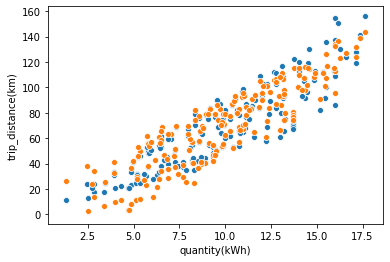

In [20]:
sns.scatterplot(X_test_enc_l['quantity(kWh)'],y_test_enc_l)
sns.scatterplot(X_test_enc_l['quantity(kWh)'],y_pred_enc_l)


In [21]:
mse(y_test_enc_l,y_pred_enc_l)

37.58099391579279

In [22]:
lr.score(X_test_enc_l,y_test_enc_l)

0.9629372260260826

In [23]:
data_enc_dum=pd.read_csv("data_enc_dummies.csv")

In [24]:
data_enc_dum.head()

,manufacturer,model,version,fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,city,motor_way,...,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,tire_type_Summer tires,tire_type_Winter tires,driving_style_Moderate,driving_style_Normal
0,Volkswagen,Golf,e-Golf,0.610891204,75140,67,7.97,Electricity,1,0,...,11.9,0,0,45.0,-0.8,Restreichweite 100km = Total 167km,1,0,0,1
1,Volkswagen,Golf,e-Golf,0.52755787,74977,106,12.29,Electricity,1,1,...,11.6,0,0,52.0,-1.1,CCS St.Katarina Restreichweite 56km = Total 162km,1,0,1,0
2,Volkswagen,Golf,e-Golf,0.485891204,74871,66,7.59,Electricity,1,0,...,11.5,0,0,44.0,-1.2,Restreichweite 105km = Total 171km,1,0,0,1
3,Volkswagen,Golf,e-Golf,0.444224537,74805,99,11.48,Electricity,1,0,...,11.6,0,0,41.0,-1.1,Restreichweite 72km = Total 171km,1,0,1,0
4,Volkswagen,Golf,e-Golf,0.360891204,74706,112,12.76,Electricity,1,1,...,11.4,0,0,40.0,-1.3,Restreichweite 50km = Total 162km,1,0,1,0


In [25]:
X_enc_dum=data_enc_dum.drop(['fuel_note','manufacturer', 'model', 'version', 'fuel_date', 'odometer',
       'trip_distance(km)', 'fuel_type'],axis=1)
Y_enc_dum=data_enc_dum['trip_distance(km)']

In [26]:
X_train_enc_dum,X_test_enc_dum,y_train_enc_dum,y_test_enc_dum=train_test_split(X_enc_dum,Y_enc_dum,random_state=1)

In [27]:
lr.fit(X_train_enc_dum,y_train_enc_dum)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred_enc_dum=lr.predict(X_test_enc_dum)

In [29]:
y_pred_enc_dum

array([ 97.8036838 , 124.19771942,  80.54075778,  77.4592984 ,
       116.14342949,  97.7481594 ,  95.93574154,  56.18533374,
        63.12924814,  73.89138228,  89.83279119,  93.10934634,
       123.06476421,  42.92394164,  90.75271944,  78.96721023,
        56.38008803,  78.09613318,  29.04132112, 115.34203807,
        56.70432077,  74.08518941, 112.78482819,  71.2391977 ,
        68.49953847,  78.05341191,  29.51485248,  93.84251781,
         2.54869077, 105.95820616,  82.86322575,  65.34616546,
        35.86320332,  46.27962369,  38.98105197,  68.77963399,
       111.50161246,  65.56036792,  83.23796653,   8.50786791,
        21.86927146,  78.84329049,  40.80983611, 131.47225948,
        91.23793378,  95.57147024,  34.39534506, 108.38537512,
         3.37352727,  83.34620403,  28.41562487,  57.76709096,
       114.39030861, 106.51971461, 100.1645247 ,  39.92190512,
       101.19961369, 110.12517658,  96.05440375,  61.27074286,
        60.69637499,  58.76739263,  84.25593799, 104.54

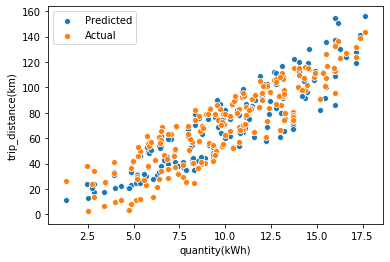

In [30]:
sns.scatterplot(X_test_enc_dum['quantity(kWh)'],y_test_enc_dum)
sns.scatterplot(X_test_enc_dum['quantity(kWh)'],y_pred_enc_dum)
plt.legend(["Predicted","Actual"])

In [31]:
mse(y_test_enc_dum,y_pred_enc_dum)

37.58099391579273

In [32]:
lr.score(X_test_enc_dum,y_test_enc_dum)

0.9629372260260826

In [33]:
mse_n=mse(y_test,y_pred)
mse_enc_l=mse(y_test_enc_l,y_pred_enc_l)
mse_enc_dum=mse(y_test_enc_dum,y_pred_enc_dum)

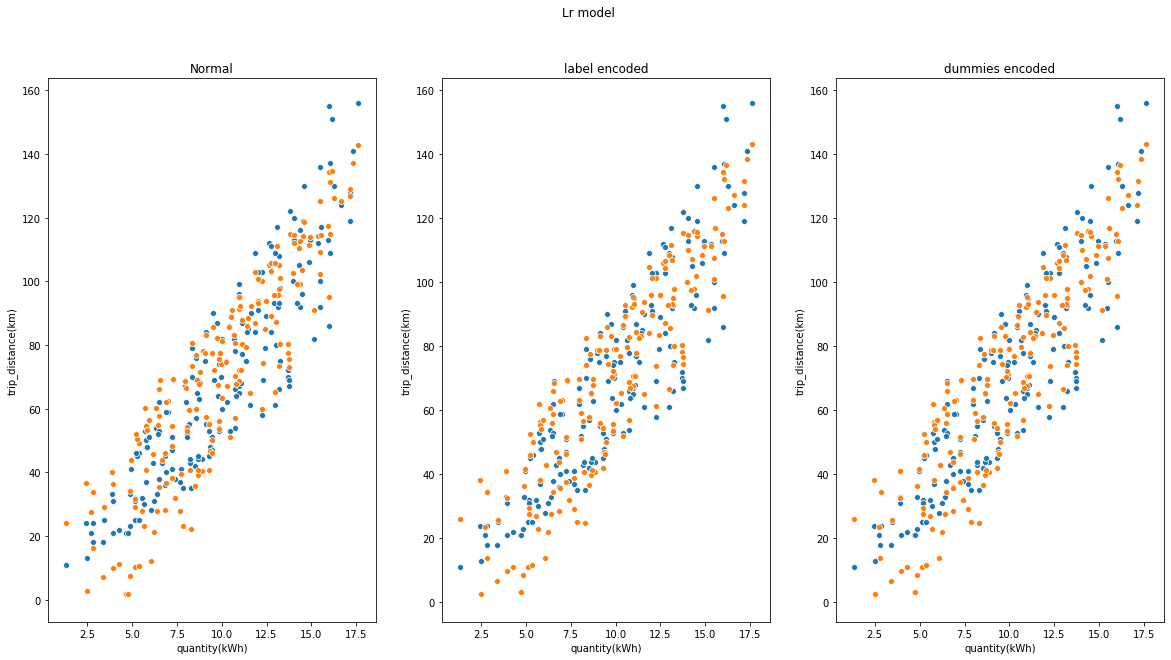

In [34]:
plt.figure(figsize=(20, 10))
plt.suptitle("Lr model")
plt.subplot(1, 3, 1)
plt.title("Normal")
sns.scatterplot(X_test['quantity(kWh)'],y_test)
sns.scatterplot(X_test['quantity(kWh)'],y_pred)


plt.subplot(1, 3, 2)
plt.title("label encoded")
sns.scatterplot(X_test_enc_l['quantity(kWh)'],y_test_enc_l)
sns.scatterplot(X_test_enc_l['quantity(kWh)'],y_pred_enc_l)


plt.subplot(1, 3, 3)
plt.title("dummies encoded")
sns.scatterplot(X_test_enc_dum['quantity(kWh)'],y_test_enc_dum)
sns.scatterplot(X_test_enc_dum['quantity(kWh)'],y_pred_enc_dum)


plt.show()


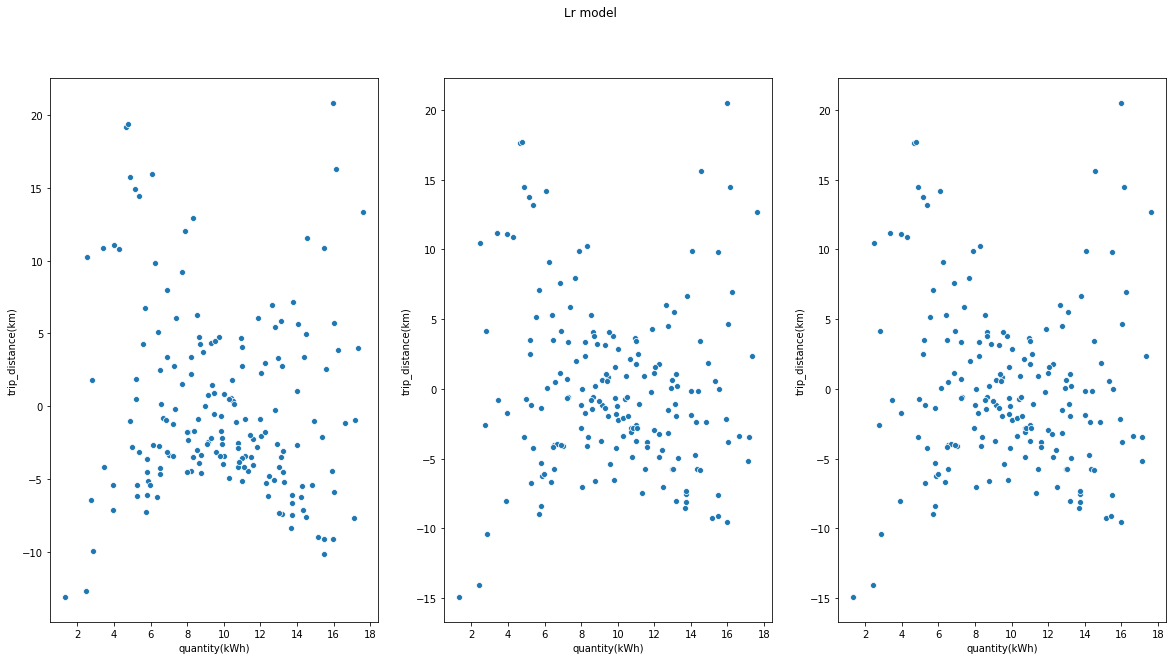

In [35]:
plt.figure(figsize=(20, 10))
plt.suptitle("Lr model")
plt.subplot(1, 3, 1)
sns.scatterplot(X_test['quantity(kWh)'],y_test-y_pred)


plt.subplot(1, 3, 2)
sns.scatterplot(X_test_enc_l['quantity(kWh)'],y_test_enc_l-y_pred_enc_l)


plt.subplot(1, 3, 3)
sns.scatterplot(X_test_enc_dum['quantity(kWh)'],y_test_enc_dum-y_pred_enc_dum)



plt.show()


In [36]:
print("MSE for normal LR is {}".format(mse_n))
print("MSE for label encoded LR is {}".format(mse_enc_l))
print("MSE for dummy encoded LR is {}".format(mse_enc_dum))

MSE for normal LR is 39.797908108629265
MSE for label encoded LR is 37.58099391579279
MSE for dummy encoded LR is 37.58099391579273


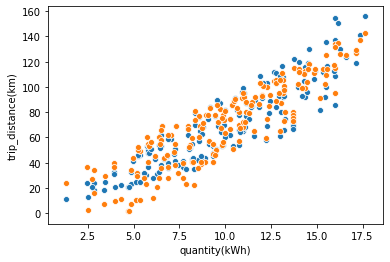

In [40]:

sns.scatterplot(X_test['quantity(kWh)'],y_test)
sns.scatterplot(X_test['quantity(kWh)'],y_pred)





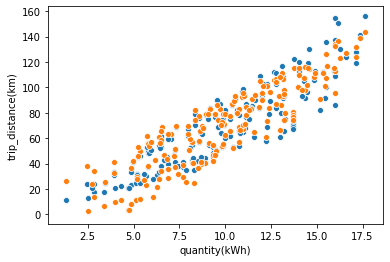

In [41]:


sns.scatterplot(X_test_enc_l['quantity(kWh)'],y_test_enc_l)
sns.scatterplot(X_test_enc_l['quantity(kWh)'],y_pred_enc_l)



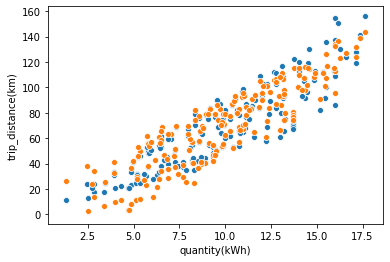

In [42]:



sns.scatterplot(X_test_enc_dum['quantity(kWh)'],y_test_enc_dum)
sns.scatterplot(X_test_enc_dum['quantity(kWh)'],y_pred_enc_dum)